# Modelo Diabetes


## *Imports*

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, roc_auc_score, roc_curve, 
                             precision_recall_curve, classification_report, f1_score)

In [2]:
# 1. Cargar datos
df = pd.read_csv('data\diabetes_dataset.csv') # Asegúrate que la ruta sea correcta en tu repo

# 2. Reporte de Calidad
print("--- INFO DEL DATASET ---")
print(df.info())
print(f"\nDuplicados encontrados: {df.duplicated().sum()}")
print(f"\nDistribución del Target (diagnosed_diabetes):\n{df['diagnosed_diabetes'].value_counts(normalize=True)}")



--- INFO DEL DATASET ---
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  str    
 2   ethnicity                           100000 non-null  str    
 3   education_level                     100000 non-null  str    
 4   income_level                        100000 non-null  str    
 5   employment_status                   100000 non-null  str    
 6   smoking_status                      100000 non-null  str    
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_h

Text(0.5, 1.0, 'Correlación de Variables Clave con Diabetes')

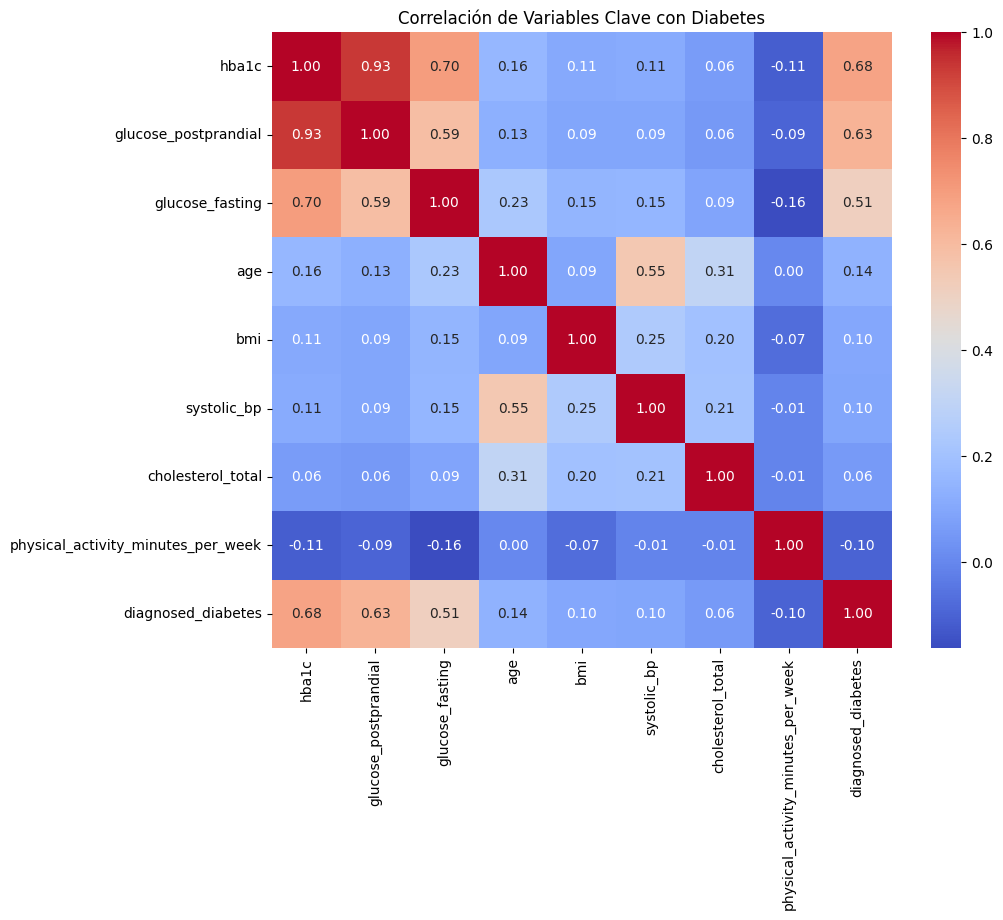

In [3]:
# 3. Matriz de Correlación (Evidencia de selección de features)
top_features = ['hba1c', 'glucose_postprandial', 'glucose_fasting', 
                'age', 'bmi', 'systolic_bp', 'cholesterol_total', 
                'physical_activity_minutes_per_week', 'diagnosed_diabetes']

plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación de Variables Clave con Diabetes")

In [4]:
# Las 8 variables ganadoras
features = [
    'hba1c', 'glucose_postprandial', 'glucose_fasting', 'age', 
    'bmi', 'systolic_bp', 'cholesterol_total', 'physical_activity_minutes_per_week'
]
X = df[features]
y = df['diagnosed_diabetes']

# Separación Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado (Fundamental para que la Regresión Logística funcione bien)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# --- 2. MODELO 1: REGRESIÓN LOGÍSTICA (Para comparación) ---
print("\n--- Entrenando Regresión Logística ---")
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]



--- Entrenando Regresión Logística ---


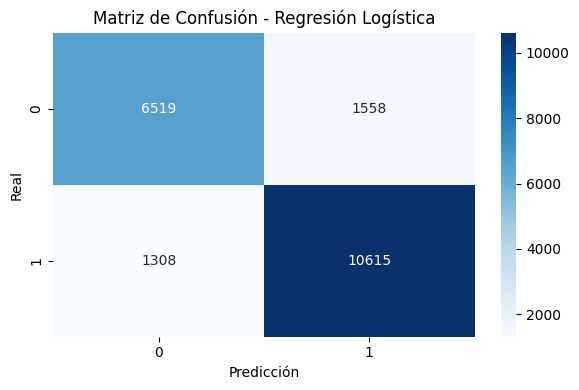

In [6]:

# Matriz de Confusión RL
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show() # También la mostramos

ROC AUC Score para Regresión Logística: 0.9325306617756954


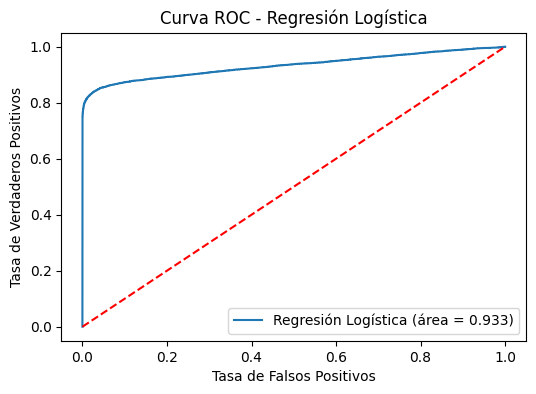

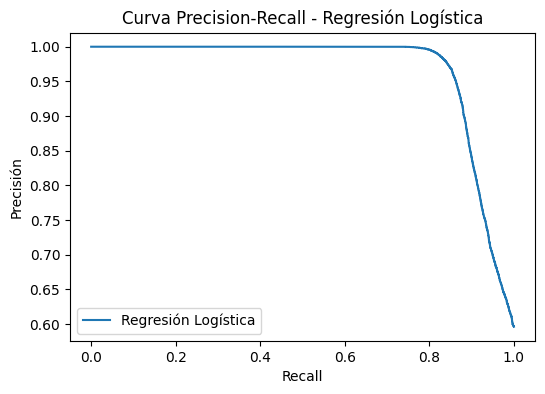

In [7]:

# ROC AUC Score RL
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score para Regresión Logística:", roc_auc)

# Curva ROC RL
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Regresión Logística (área = %0.3f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.show()

# Curva Precision-Recall RL
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label='Regresión Logística')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precision-Recall - Regresión Logística')
plt.legend()
plt.show()

In [8]:
# --- 3. MODELO 2: BOSQUE ALEATORIO (Modelo Final) ---
print("\n--- Entrenando Bosque Aleatorio ---")
# Usamos tu configuración con class_weight='balanced'
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("\nReporte de clasificación para Bosque Aleatorio:")
print(classification_report(y_test, y_pred_rf))



--- Entrenando Bosque Aleatorio ---

Reporte de clasificación para Bosque Aleatorio:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000



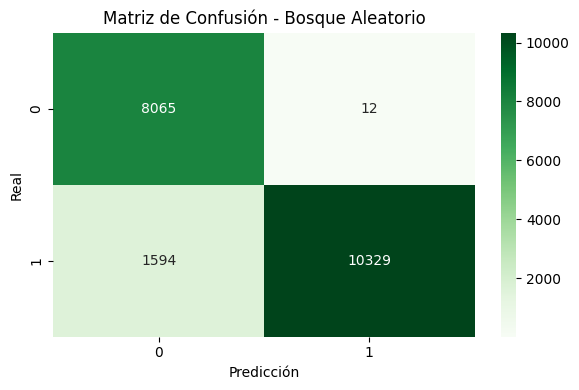

ROC AUC Score para Bosque Aleatorio: 0.9368239546997904


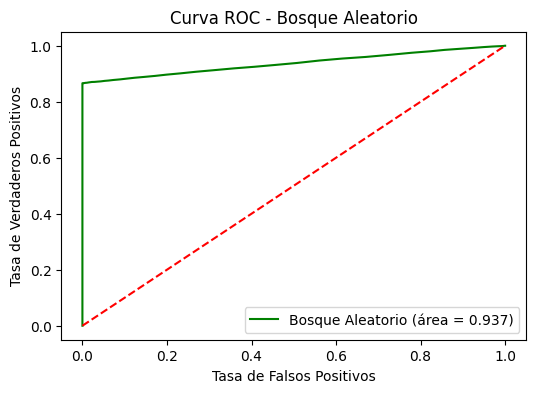

In [9]:
# Matriz de Confusión RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens') # Cambié a verde para distinguir
plt.title('Matriz de Confusión - Bosque Aleatorio')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()

plt.show()

# ROC AUC Score RF
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC AUC Score para Bosque Aleatorio:", roc_auc_rf)

# Curva ROC RF
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label='Bosque Aleatorio (área = %0.3f)' % roc_auc_rf, color='green')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Bosque Aleatorio')
plt.legend()
plt.show()

In [10]:
print("\nExportando modelo ganador (Random Forest) y Scaler...")
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Exportando modelo ganador (Random Forest) y Scaler...
